# Battle of London Borough
#### Finding the Best Place to live for Body Building Enthusiast

## 1. Introduction

### 1.1. Background

Body Building is the process of putting on muscle through working out and dedicated yourself to a steady routine. It also involves constructing one’s diet to help the muscle create mass and instigate muscle growth. A type of person who decides to begin bodybuilding must be very disciplined and commit to an exhausting workout regiment, and to change their eating habits consistently each day. A person who is just beginning to commit to becoming a bodybuilder should always seek out professional advice. Some will consult with a nutritionist for the food side of the bodybuilding program, and then consult a personal trainer for the physical side of the process. Both will help you keep safe during the bodybuilding process while you increase muscle mass and increase the potential for success. To properly build your body and increase muscle size, professional bodybuilders have used three main strategies to maximize their muscles: Strength Training, Specialized Nutrition, and Adequate Rest.


There are two main factors of successful bodybuilding: workout consistently and consume good nutrition. As we can see, people who want to begin doing body building have to do workout routine to get the body they want. As well as people who has been on body building for a long time have to maintain their workout routine to stay in shape.

### 1.2. Ideas

Ideas to solve the problem:

1. Find nearby venues on each borough in London
2. Retrieve all gym venues on London to be analyzed 
3. Cluster gym venues using Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
4. Analyze the clusters wether it is already show the most dense gym venues in small area
5. If clusters is too large (point 4), find the subcluster to obtain the most suitable area which sorrounded by many gym venues

### 1.3. Data

1. List of London Borough
Source : from the Wikipedia (London Boroughs, link : https://en.wikipedia.org/wiki/London_boroughs)

    How to use the Data:
    - Obtain Data using BeautifulSoup
    - Data of Borough Name will be used for searching the coordinate of Borough, and then finding the nearby gym venues

2. Coordinate of Borough
Source : longitude and latitiude of each borough can be retrieved with Geopy library

    How to use the Data:
    - Obtain Data Geopy library
    - Data will be used for searchig nearby gym venues

3. Venues
Source : Foursquare API

    How to use the Data:
    - Obtain with Foursquare API
    - Data will be used to cluster the venues based on the location

### 1.4. Methodology

1. Get Table of list of London Borough using beautiful soup from wikipedia page
2. Get the coordinate data (longitude and latitude) from each borough using geopy library
3. From each borough, find the near venue on radius 2km with specific category id of gym / fitness center
4. Clean data and do the preprocessing method
5. Cluster the gym data using DBSCAN
6. Analyze the clusters wether it is already show the most dense gym venues in small area
7. If clusters is too large (point 4), find the subcluster to obtain the most suitable area which sorrounded by many gym venues
8. Find the conclusion and summary of the entire process and output

# 

## 2. Data (Collection and Preparation)

1. List of London Borough
Source : from the Wikipedia (London Boroughs, link : https://en.wikipedia.org/wiki/London_boroughs)

    How to use the Data:
    - Obtain Data using BeautifulSoup
    - Data of Borough Name will be used for searching the coordinate of Borough, and then finding the nearby gym venues

2. Coordinate of Borough
Source : longitude and latitiude of each borough can be retrieved with Geopy library

    How to use the Data:
    - Obtain Data Geopy library
    - Data will be used for searchig nearby gym venues

3. Venues
Source : Foursquare API

    How to use the Data:
    - Obtain with Foursquare API
    - Data will be used to cluster the venues based on the location

### 2.1 Import required libraries
Especially for downloading and working with table from Wikipedia

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

### 2.2 Get the URL and create Beautiful Soup Object

In [2]:
URL = 'https://en.wikipedia.org/wiki/London_boroughs'
page = requests.get(URL)

In [3]:
soup = BeautifulSoup(page.content, 'html.parser')

### 2.3 Get the Table from Wikipedia

In [4]:
table = soup.find_all('table')

In [5]:
len(table)

9

In [6]:
table_raw = pd.read_html(str(table[2]), flavor='bs4')[0] #table(2) is the selected table
table_raw.reset_index(drop=True)
table_raw

London borough Designation                  Former areas  \
0                   Camden       Inner               Hampstead (11a)   
1                Greenwich       Inner               Greenwich (22a)   
2                  Hackney       Inner                  Hackney (9a)   
3     Hammersmith[notes 2]       Inner              Hammersmith (4a)   
4                Islington       Inner               Islington (10a)   
5   Kensington and Chelsea       Inner               Kensington (3a)   
6                  Lambeth       Inner                  Lambeth (6a)   
7                 Lewisham       Inner                Lewisham (21a)   
8                Southwark       Inner               Bermondsey (7b)   
9            Tower Hamlets       Inner            Bethnal Green (8a)   
10              Wandsworth       Inner                Battersea (5b)   
11             Westminster       Inner               Paddington (2c)   
12        Barking[notes 3]       Outer          Barking (part) (25a)   
13                  Barnet       Outer                  Barnet (31a)   
14                  Bexley       Outer                  Bexley (23b)   
15                   Brent       Outer                 Wembley (12a)   
16                 Bromley       Outer                 Bromley (20c)   
17                 Croydon       Outer                 Croydon (19a)   
18                  Ealing       Outer                   Acton (13b)   
19                 Enfield       Outer                Edmonton (30c)   
20                Haringey       Outer                 Hornsey (29b)   
21                  Harrow       Outer                   Harrow (32)   
22                Havering       Outer                 Romford (24a)   
23              Hillingdon       Outer    Hayes and Harlington (33c)   
24                Hounslow       Outer  Brentford and Chiswick (14c)   
25    Kingston upon Thames       Outer    Kingston upon Thames (16a)   
26                  Merton       Outer                 Mitcham (17c)   
27                  Newham       Outer                West Ham (27a)   
28               Redbridge       Outer                  Ilford (26a)   
29    Richmond upon Thames       Outer                  Barnes (15a)   
30                  Sutton       Outer              Beddington (18c)   
31          Waltham Forest       Outer               Chingford (28a)   

                 Former areas.1              Former areas.2  \
0              St Pancras (11b)               Holborn (11c)   
1         Woolwich (part) (22b)                         NaN   
2               Shoreditch (9b)        Stoke Newington (9c)   
3                   Fulham (4b)                         NaN   
4                Finsbury (10b)                         NaN   
5                  Chelsea (3b)                         NaN   
6        Wandsworth (part) (6b)                         NaN   
7                Deptford (21b)                         NaN   
8               Camberwell (7c)              Southwark (7a)   
9                   Poplar (8c)                Stepney (8b)   
10       Wandsworth (part) (5a)                         NaN   
11           St Marylebone (2b)            Westminster (2a)   
12        Dagenham (part) (25b)                         NaN   
13            East Barnet (31b)              Finchley (31d)   
14                  Erith (23a)              Crayford (23c)   
15              Willesden (12b)                         NaN   
16              Beckenham (20b)             Orpington (20e)   
17    Coulsdon and Purley (19b)                         NaN   
18                 Ealing (13a)              Southall (13c)   
19                Enfield (30a)             Southgate (30b)   
20              Tottenham (29c)            Wood Green (29a)   
21                          NaN                         NaN   
22             Hornchurch (24b)                         NaN   
23      Ruislip Northwood (33b)              Uxbridge (33a)   
24                Feltham (14a)  Heston and Isleworth (14b) 

In [7]:
london_bor = pd.DataFrame(table_raw[['London borough','Designation']])
london_bor.rename(columns = {'London borough':'Borough'}, inplace=True)
london_bor

Borough Designation
0                   Camden       Inner
1                Greenwich       Inner
2                  Hackney       Inner
3     Hammersmith[notes 2]       Inner
4                Islington       Inner
5   Kensington and Chelsea       Inner
6                  Lambeth       Inner
7                 Lewisham       Inner
8                Southwark       Inner
9            Tower Hamlets       Inner
10              Wandsworth       Inner
11             Westminster       Inner
12        Barking[notes 3]       Outer
13                  Barnet       Outer
14                  Bexley       Outer
15                   Brent       Outer
16                 Bromley       Outer
17                 Croydon       Outer
18                  Ealing       Outer
19                 Enfield       Outer
20                Haringey       Outer
21                  Harrow       Outer
22                Havering       Outer
23              Hillingdon       Outer
24                Hounslow       Outer
25    Kingston upon Thames       Outer
26                  Merton       Outer
27                  Newham       Outer
28               Redbridge       Outer
29    Richmond upon Thames       Outer
30                  Sutton       Outer
31          Waltham Forest       Outer

In [8]:
# rename the incorrect name of borough
london_bor['Borough'] = london_bor['Borough'].str.replace('[notes 2]', '', regex=False)
london_bor['Borough'] = london_bor['Borough'].str.replace('[notes 3]', '', regex=False)
london_bor

Borough Designation
0                   Camden       Inner
1                Greenwich       Inner
2                  Hackney       Inner
3              Hammersmith       Inner
4                Islington       Inner
5   Kensington and Chelsea       Inner
6                  Lambeth       Inner
7                 Lewisham       Inner
8                Southwark       Inner
9            Tower Hamlets       Inner
10              Wandsworth       Inner
11             Westminster       Inner
12                 Barking       Outer
13                  Barnet       Outer
14                  Bexley       Outer
15                   Brent       Outer
16                 Bromley       Outer
17                 Croydon       Outer
18                  Ealing       Outer
19                 Enfield       Outer
20                Haringey       Outer
21                  Harrow       Outer
22                Havering       Outer
23              Hillingdon       Outer
24                Hounslow       Outer
25    Kingston upon Thames       Outer
26                  Merton       Outer
27                  Newham       Outer
28               Redbridge       Outer
29    Richmond upon Thames       Outer
30                  Sutton       Outer
31          Waltham Forest       Outer

Add city of london Area

In [9]:
london_bor.loc[len(london_bor.index)] = ['City of London', 'Inner'] 

In [10]:
london_bor

Borough Designation
0                   Camden       Inner
1                Greenwich       Inner
2                  Hackney       Inner
3              Hammersmith       Inner
4                Islington       Inner
5   Kensington and Chelsea       Inner
6                  Lambeth       Inner
7                 Lewisham       Inner
8                Southwark       Inner
9            Tower Hamlets       Inner
10              Wandsworth       Inner
11             Westminster       Inner
12                 Barking       Outer
13                  Barnet       Outer
14                  Bexley       Outer
15                   Brent       Outer
16                 Bromley       Outer
17                 Croydon       Outer
18                  Ealing       Outer
19                 Enfield       Outer
20                Haringey       Outer
21                  Harrow       Outer
22                Havering       Outer
23              Hillingdon       Outer
24                Hounslow       Outer
25    Kingston upon Thames       Outer
26                  Merton       Outer
27                  Newham       Outer
28               Redbridge       Outer
29    Richmond upon Thames       Outer
30                  Sutton       Outer
31          Waltham Forest       Outer
32          City of London       Inner

### 2.4. Add Geo Data of The Boroughs

In [11]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [12]:
address = ', London'
london_bor['Longitude'] = london_bor['Designation']
london_bor['Latitude'] = london_bor['Designation']


for k in range(len(london_bor)):
    geolocator = Nominatim(user_agent="t_explorer")
    location = geolocator.geocode(str(london_bor['Borough'][k]) + address)
    latitude = location.latitude
    longitude = location.longitude
    london_bor['Latitude'][k] = latitude
    london_bor['Longitude'][k] = longitude

In [13]:
london_bor.head()

Borough Designation Longitude   Latitude
0       Camden       Inner  -0.13956  51.542305
1    Greenwich       Inner -0.004542  51.482084
2      Hackney       Inner -0.049362   51.54324
3  Hammersmith       Inner  -0.22364  51.492038
4    Islington       Inner -0.099905  51.538429

### 2.5. Visualize The Boroughs in London

In [14]:
address = 'London'

geolocator = Nominatim(user_agent="t_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [15]:
import folium # map rendering library

In [16]:
# create map of London using latitude and longitude values
map_london = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, Des, Borough in zip(london_bor['Latitude'], london_bor['Longitude'], london_bor['Designation'], london_bor['Borough']):
    label = '{}, {}'.format(Borough, Des)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

# 

## 3. Retrieving Venues From Foursquare

### 3.1. Define Keys and Function

In [17]:
CLIENT_ID = '1BCHB0C1RPZKMYMFZNFR5M1JQLSGSKPSNOCOLZLDYV0U1PUT' # your Foursquare ID
CLIENT_SECRET = 'RYUK0Q03OPC4WN5OWIP0SDZ2A4K02KDAL3ZTXJHW5Z4KKZDD' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1BCHB0C1RPZKMYMFZNFR5M1JQLSGSKPSNOCOLZLDYV0U1PUT
CLIENT_SECRET:RYUK0Q03OPC4WN5OWIP0SDZ2A4K02KDAL3ZTXJHW5Z4KKZDD


In [18]:
category_id = '4bf58dd8d48988d175941735'

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, category_id, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### 3.2. Retrieve Venues in London

In [20]:
london_venues = getNearbyVenues(names=london_bor['Borough'],
                                   latitudes=london_bor['Latitude'],
                                   longitudes=london_bor['Longitude']
                                  )

Camden
Greenwich
Hackney
Hammersmith
Islington
Kensington and Chelsea
Lambeth
Lewisham
Southwark
Tower Hamlets
Wandsworth
Westminster
Barking
Barnet
Bexley
Brent
Bromley
Croydon
Ealing
Enfield
Haringey
Harrow
Havering
Hillingdon
Hounslow
Kingston upon Thames
Merton
Newham
Redbridge
Richmond upon Thames
Sutton
Waltham Forest
City of London


In [21]:
london_venues

Borough  Borough Latitude  Borough Longitude  \
0             Camden         51.542305          -0.139560   
1             Camden         51.542305          -0.139560   
2             Camden         51.542305          -0.139560   
3             Camden         51.542305          -0.139560   
4             Camden         51.542305          -0.139560   
...              ...               ...                ...   
1027  City of London         51.515618          -0.091998   
1028  City of London         51.515618          -0.091998   
1029  City of London         51.515618          -0.091998   
1030  City of London         51.515618          -0.091998   
1031  City of London         51.515618          -0.091998   

                        Venue  Venue Latitude  Venue Longitude  \
0                     PureGym       51.539250        -0.143077   
1                       FRAME       51.536593        -0.122553   
2            Barry's Bootcamp       51.527075        -0.131056   
3                     PureGym       51.554052        -0.144984   
4                 Urban Kings       51.531300        -0.121950   
...                       ...             ...              ...   
1027          Assam Place Gym       51.515643        -0.067872   
1028        adidas studio LDN       51.521747        -0.071571   
1029                 Sweat It       51.513505        -0.117654   
1030  Rosewood Fitness Center       51.517430        -0.117950   
1031  Personal Trainer London       51.501151        -0.106735   

            Venue Category  
0     Gym / Fitness Center  
1                      Gym  
2     Gym / Fitness Center  
3     Gym / Fitness Center  
4     Gym / Fitness Center  
...                    ...  
1027                   Gym  
1028        Pilates Studio  
1029                   Gym  
1030                   Gym  
1031                   Gym  

[1032 rows x 7 columns]

In [22]:
london_venues.groupby('Borough').count()


Borough Latitude  Borough Longitude  Venue  \
Borough                                                              
Barking                                4                  4      4   
Barnet                                 6                  6      6   
Bexley                                 2                  2      2   
Brent                                  5                  5      5   
Bromley                               11                 11     11   
Camden                                50                 50     50   
City of London                       100                100    100   
Croydon                                8                  8      8   
Ealing                                12                 12     12   
Enfield                                6                  6      6   
Greenwich                             21                 21     21   
Hackney                               44                 44     44   
Hammersmith                           46                 46     46   
Haringey                              11                 11     11   
Harrow                                 8                  8      8   
Havering                              47                 47     47   
Hillingdon                             3                  3      3   
Hounslow                               6                  6      6   
Islington                             91                 91     91   
Kensington and Chelsea                78                 78     78   
Kingston upon Thames                   8                  8      8   
Lambeth                               76                 76     76   
Lewisham                              17                 17     17   
Merton                                13                 13     13   
Newham                                12                 12     12   
Redbridge                              3                  3      3   
Richmond upon Thames                   5                  5      5   
Southwark                             90                 90     90   
Sutton                                 9                  9      9   
Tower Hamlets                         99                 99     99   
Waltham Forest                         8                  8      8   
Wandsworth                            47                 47     47   
Westminster                           86                 86     86   

                        Venue Latitude  Venue Longitude  Venue Category  
Borough                                                                  
Barking                              4                4               4  
Barnet                               6                6               6  
Bexley                               2                2               2  
Brent                                5                5               5  
Bromley                             11               11              11  
Camden                              50               50              50  
City of London                     100              100             100  
Croydon                              8                8               8  
Ealing                              12               12              12  
Enfield                              6                6               6  
Greenwich                           21               21              21  
Hackney                             44               44              44  
Hammersmith                         46               46              46  
Haringey                            11               11              11  
Harrow                               8                8               8  
Havering                            47               47              47  
Hillingdon                           3                3               3  
Hounslow                             6                6               6  
Islington                           91               91              91  
Kensington and Chel

### 3.3. Explore the Venue Categories

In [23]:
print('There are {} uniques categories.'.format(len(london_venues['Venue Category'].unique())))

There are 29 uniques categories.


In [24]:
london_venues['Venue Category'].unique()

array(['Gym / Fitness Center', 'Gym', 'Yoga Studio', 'Gymnastics Gym',
       'School', 'Gym Pool', 'Martial Arts School', 'Pool', 'Track',
       'Pilates Studio', 'Buddhist Temple', 'Climbing Gym',
       'Chiropractor', 'Business Service', "Women's Store", 'Boxing Gym',
       'Dance Studio', 'Cycle Studio', 'College Gym', 'Spa',
       'Circus School', 'Athletics & Sports', 'Bakery', 'Temple',
       'Badminton Court', 'Cricket Ground', 'Massage Studio',
       'Soccer Field', 'Physical Therapist'], dtype=object)

### 3.4. Select Gym Venues

In [25]:
gym_categories = ['Gym / Fitness Center', 'Gym']

gym_data_raw = pd.DataFrame()

for cat in gym_categories:
    _select_ven = london_venues[london_venues['Venue Category'] == cat]
    gym_data_raw = gym_data_raw.append(_select_ven)
gym_data_raw = gym_data_raw.reset_index(drop=True)
gym_data_raw

Borough  Borough Latitude  Borough Longitude  \
0            Camden         51.542305          -0.139560   
1            Camden         51.542305          -0.139560   
2            Camden         51.542305          -0.139560   
3            Camden         51.542305          -0.139560   
4            Camden         51.542305          -0.139560   
..              ...               ...                ...   
823  City of London         51.515618          -0.091998   
824  City of London         51.515618          -0.091998   
825  City of London         51.515618          -0.091998   
826  City of London         51.515618          -0.091998   
827  City of London         51.515618          -0.091998   

                                   Venue  Venue Latitude  Venue Longitude  \
0                                PureGym       51.539250        -0.143077   
1                       Barry's Bootcamp       51.527075        -0.131056   
2                                PureGym       51.554052        -0.144984   
3                            Urban Kings       51.531300        -0.121950   
4    Somers Town Community Sports Centre       51.532768        -0.133157   
..                                   ...             ...              ...   
823                Crossfit Aldgate East       51.514626        -0.069102   
824                      Assam Place Gym       51.515643        -0.067872   
825                             Sweat It       51.513505        -0.117654   
826              Rosewood Fitness Center       51.517430        -0.117950   
827              Personal Trainer London       51.501151        -0.106735   

           Venue Category  
0    Gym / Fitness Center  
1    Gym / Fitness Center  
2    Gym / Fitness Center  
3    Gym / Fitness Center  
4    Gym / Fitness Center  
..                    ...  
823                   Gym  
824                   Gym  
825                   Gym  
826                   Gym  
827                   Gym  

[828 rows x 7 columns]

In [26]:
gym_data_raw.shape

(828, 7)

Delete duplicate, to get the unique venues:

In [27]:
gym_data = gym_data_raw.drop_duplicates(subset=["Venue", "Venue Latitude"]).reset_index(drop=True)

In [28]:
gym_data.shape

(541, 7)

Since the Deleted Duplicate can be the nearest borough, we try to find the nearest borough of all unique gym venues:

In [29]:
nearest_borough = []

In [30]:
for venue in range(len(gym_data.index)):
    jarak = list((gym_data['Venue Latitude'][venue] - london_bor['Latitude'])**2 + (gym_data['Venue Longitude'][venue] - london_bor['Longitude'])**2)
    nearest_borough.append(jarak.index(min(jarak)))

In [31]:
gym_data['Nearest Borough'] = list(london_bor['Borough'][nearest_borough])

In [32]:
gym_data

Borough  Borough Latitude  Borough Longitude  \
0                  Camden         51.542305          -0.139560   
1                  Camden         51.542305          -0.139560   
2                  Camden         51.542305          -0.139560   
3                  Camden         51.542305          -0.139560   
4                  Camden         51.542305          -0.139560   
..                    ...               ...                ...   
536  Richmond upon Thames         51.440553          -0.307639   
537                Sutton         51.357464          -0.173627   
538        Waltham Forest         51.563187          -0.028841   
539        City of London         51.515618          -0.091998   
540        City of London         51.515618          -0.091998   

                                   Venue  Venue Latitude  Venue Longitude  \
0                                PureGym       51.539250        -0.143077   
1                       Barry's Bootcamp       51.527075        -0.131056   
2                                PureGym       51.554052        -0.144984   
3                            Urban Kings       51.531300        -0.121950   
4    Somers Town Community Sports Centre       51.532768        -0.133157   
..                                   ...             ...              ...   
536                       Blitz CrossFit       51.448928        -0.332068   
537                               Go-Gym       51.360355        -0.195039   
538                Leyton Leisure Centre       51.573975        -0.010304   
539                 Shoreditch House Gym       51.523687        -0.076177   
540                         Montcalm Gym       51.520826        -0.091617   

           Venue Category       Nearest Borough  
0    Gym / Fitness Center                Camden  
1    Gym / Fitness Center                Camden  
2    Gym / Fitness Center              Havering  
3    Gym / Fitness Center                Camden  
4    Gym / Fitness Center                Camden  
..                    ...                   ...  
536                   Gym  Richmond upon Thames  
537                   Gym                Sutton  
538                   Gym        Waltham Forest  
539                   Gym        City of London  
540                   Gym        City of London  

[541 rows x 8 columns]

In [33]:
gym_data = gym_data.drop(columns=['Borough','Borough Latitude', 'Borough Longitude'])

In [34]:
gym_data = gym_data.rename(columns={'Nearest Borough':'Borough'})

In [35]:
gym_data

Venue  Venue Latitude  Venue Longitude  \
0                                PureGym       51.539250        -0.143077   
1                       Barry's Bootcamp       51.527075        -0.131056   
2                                PureGym       51.554052        -0.144984   
3                            Urban Kings       51.531300        -0.121950   
4    Somers Town Community Sports Centre       51.532768        -0.133157   
..                                   ...             ...              ...   
536                       Blitz CrossFit       51.448928        -0.332068   
537                               Go-Gym       51.360355        -0.195039   
538                Leyton Leisure Centre       51.573975        -0.010304   
539                 Shoreditch House Gym       51.523687        -0.076177   
540                         Montcalm Gym       51.520826        -0.091617   

           Venue Category               Borough  
0    Gym / Fitness Center                Camden  
1    Gym / Fitness Center                Camden  
2    Gym / Fitness Center              Havering  
3    Gym / Fitness Center                Camden  
4    Gym / Fitness Center                Camden  
..                    ...                   ...  
536                   Gym  Richmond upon Thames  
537                   Gym                Sutton  
538                   Gym        Waltham Forest  
539                   Gym        City of London  
540                   Gym        City of London  

[541 rows x 5 columns]

### 3.5. Visualize Gym Venues

In [36]:
address = 'London'

geolocator = Nominatim(user_agent="t_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [37]:
# create map of London using latitude and longitude values
map_london_selected = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, Ven, Ven_cat, Borough in zip(gym_data['Venue Latitude'], 
                                           gym_data['Venue Longitude'], 
                                           gym_data['Venue'], 
                                           gym_data['Venue Category'], 
                                           gym_data['Borough']
                                          ):
    label = 'Venue: {}, Category: {}, Borough: {}'.format(Ven, Ven_cat, Borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london_selected)  
    
map_london_selected

# 

## 4. Clustering Gym Venues

### 4.1. Select Clustering Dataset

In [38]:
gym_clustering = gym_data[['Venue Latitude', 'Venue Longitude']]
gym_clustering

Venue Latitude  Venue Longitude
0         51.539250        -0.143077
1         51.527075        -0.131056
2         51.554052        -0.144984
3         51.531300        -0.121950
4         51.532768        -0.133157
..              ...              ...
536       51.448928        -0.332068
537       51.360355        -0.195039
538       51.573975        -0.010304
539       51.523687        -0.076177
540       51.520826        -0.091617

[541 rows x 2 columns]

### 4.2. Data Normalization

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
gym_clustering = StandardScaler().fit_transform(gym_clustering)
gym_clustering

array([[ 0.696691  , -0.14842215],
       [ 0.43633864, -0.00458896],
       [ 1.0132147 , -0.17123984],
       ...,
       [ 1.43925655,  1.44022766],
       [ 0.3638954 ,  0.65205081],
       [ 0.30270892,  0.46730502]])

### 4.3. Clustering using DBSCAN

#### 4.3.1. Find the optimum Epsilon

In [41]:
from sklearn.neighbors import NearestNeighbors

In [42]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(gym_clustering)
distances, indices = nbrs.kneighbors(gym_clustering)

In [43]:
from matplotlib import pyplot as plt

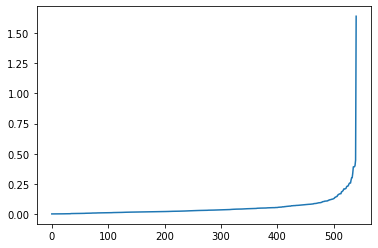

In [44]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

The Optimum Epsilon is around 0.25

#### 4.3.2. Clustering with DBSCAN

In [45]:
from sklearn.cluster import DBSCAN

In [46]:
epsilon = 0.25
minimumSamples = 20

db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(gym_clustering)
labels = db.labels_
labels

array([ 0,  0, -1,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1, -1,  0,  0, -1,
        0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  0,  1, -1,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [47]:
# Number of clusters in labels, including noise if present.
DBSCANclusters = len(set(labels))
DBSCANclusters

4

In [48]:
# add clustering labels
gym_data_clustered = gym_data.copy()
gym_data_clustered.insert(0, 'Cluster', labels)
gym_data_clustered.head(3)

Cluster             Venue  Venue Latitude  Venue Longitude  \
0        0           PureGym       51.539250        -0.143077   
1        0  Barry's Bootcamp       51.527075        -0.131056   
2       -1           PureGym       51.554052        -0.144984   

         Venue Category   Borough  
0  Gym / Fitness Center    Camden  
1  Gym / Fitness Center    Camden  
2  Gym / Fitness Center  Havering

### 4.4. Visualize Clustering Output

In [49]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [50]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(DBSCANclusters)
ys = [i + x + (i*x)**2 for i in range(DBSCANclusters)]
colors_array = cm.gist_rainbow_r(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, Ven, Ven_cat, Borough, cluster in zip(gym_data_clustered['Venue Latitude'], 
                                                    gym_data_clustered['Venue Longitude'], 
                                                    gym_data_clustered['Venue'], 
                                                    gym_data_clustered['Venue Category'],
                                                    gym_data_clustered['Borough'],
                                                    gym_data_clustered['Cluster']
                                                   ):
    label = 'Venue: {}, Category: {}, Borough: {}, Cluster: {}'.format(Ven, Ven_cat, Borough, cluster)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

# 

### 4.5. Analyze each Cluster

In [51]:
pd.options.display.max_rows = 10

#### 4.5.1. Cluster 1

In [52]:
gym_data_clustered.loc[gym_data_clustered['Cluster'] == 0]

Cluster                                Venue  Venue Latitude  \
0          0                              PureGym       51.539250   
1          0                     Barry's Bootcamp       51.527075   
3          0                          Urban Kings       51.531300   
4          0  Somers Town Community Sports Centre       51.532768   
6          0        Pancras Square Leisure Centre       51.533709   
..       ...                                  ...             ...   
499        0                     The May Fair Gym       51.508483   
500        0                          Dolphin Gym       51.486571   
501        0              Hiton Fitness By Precor       51.505676   
539        0                 Shoreditch House Gym       51.523687   
540        0                         Montcalm Gym       51.520826   

     Venue Longitude        Venue Category         Borough  
0          -0.143077  Gym / Fitness Center          Camden  
1          -0.131056  Gym / Fitness Center          Camden  
3          -0.121950  Gym / Fitness Center          Camden  
4          -0.133157  Gym / Fitness Center          Camden  
6          -0.126546  Gym / Fitness Center          Camden  
..               ...                   ...             ...  
499        -0.144305                   Gym     Westminster  
500        -0.136734                   Gym     Westminster  
501        -0.150208                   Gym     Westminster  
539        -0.076177                   Gym  City of London  
540        -0.091617                   Gym  City of London  

[273 rows x 6 columns]

In [53]:
gym_data_clustered.loc[gym_data_clustered['Cluster'] == 0].groupby('Borough').count()

Cluster  Venue  Venue Latitude  Venue Longitude  \
Borough                                                                   
Camden                       21     21              21               21   
City of London               83     83              83               83   
Hackney                      16     16              16               16   
Havering                      1      1               1                1   
Islington                    32     32              32               32   
Kensington and Chelsea        1      1               1                1   
Lambeth                      13     13              13               13   
Southwark                    25     25              25               25   
Tower Hamlets                34     34              34               34   
Westminster                  47     47              47               47   

                        Venue Category  
Borough                                 
Camden                              21  
City of London                      83  
Hackney                             16  
Havering                             1  
Islington                           32  
Kensington and Chelsea               1  
Lambeth                             13  
Southwark                           25  
Tower Hamlets                       34  
Westminster                         47

#### 4.5.2. Cluster 2

In [54]:
gym_data_clustered.loc[gym_data_clustered['Cluster'] == 1]

Cluster                                    Venue  Venue Latitude  \
49         1                          Core Collective       51.499589   
50         1                                  PureGym       51.494197   
51         1  Nuffield Health Fitness & Wellbeing Gym       51.476983   
52         1                Charing Cross Sports Club       51.485631   
53         1                         DW Fitness First       51.494833   
..       ...                                      ...             ...   
414        1                              Equilibrium       51.508631   
434        1          The Gym (Associated Newspapers)       51.501580   
435        1                   Training and Therapies       51.492546   
436        1                          Method Movement       51.489357   
437        1                          Duo you plus us       51.486382   

     Venue Longitude        Venue Category                 Borough  
49         -0.198630  Gym / Fitness Center  Kensington and Chelsea  
50         -0.224909  Gym / Fitness Center             Hammersmith  
51         -0.221961  Gym / Fitness Center             Hammersmith  
52         -0.219649  Gym / Fitness Center             Hammersmith  
53         -0.226332  Gym / Fitness Center             Hammersmith  
..               ...                   ...                     ...  
414        -0.215787                   Gym             Hammersmith  
434        -0.190080                   Gym  Kensington and Chelsea  
435        -0.188500                   Gym  Kensington and Chelsea  
436        -0.190891                   Gym  Kensington and Chelsea  
437        -0.180151                   Gym  Kensington and Chelsea  

[73 rows x 6 columns]

In [55]:
gym_data_clustered.loc[gym_data_clustered['Cluster'] == 1].groupby('Borough').count()

Cluster  Venue  Venue Latitude  Venue Longitude  \
Borough                                                                   
Hammersmith                  31     31              31               31   
Kensington and Chelsea       38     38              38               38   
Wandsworth                    4      4               4                4   

                        Venue Category  
Borough                                 
Hammersmith                         31  
Kensington and Chelsea              38  
Wandsworth                           4

#### 4.5.3. Cluster 3

In [56]:
gym_data_clustered.loc[gym_data_clustered['Cluster'] == 2]

Cluster                         Venue  Venue Latitude  Venue Longitude  \
243        2                       easyGym       51.456063        -0.193755   
244        2                 Virgin Active       51.462256        -0.190303   
245        2          Harbour Club Chelsea       51.470165        -0.184743   
246        2                       PureGym       51.460239        -0.213934   
247        2                       PureGym       51.456930        -0.192081   
..       ...                           ...             ...              ...   
262        2           The Token Yard Club       51.464581        -0.215282   
490        2  The Wandle Recreation Centre       51.452875        -0.193164   
491        2  Matt Dowse Personal Training       51.455033        -0.193017   
492        2         Riverside Quarter Gym       51.462202        -0.197584   
494        2          Physical Culture Gym       51.461748        -0.210362   

           Venue Category     Borough  
243  Gym / Fitness Center  Wandsworth  
244  Gym / Fitness Center  Wandsworth  
245  Gym / Fitness Center  Wandsworth  
246  Gym / Fitness Center  Wandsworth  
247  Gym / Fitness Center  Wandsworth  
..                    ...         ...  
262  Gym / Fitness Center  Wandsworth  
490                   Gym  Wandsworth  
491                   Gym  Wandsworth  
492                   Gym  Wandsworth  
494                   Gym  Wandsworth  

[21 rows x 6 columns]

In [57]:
gym_data_clustered.loc[gym_data_clustered['Cluster'] == 2].groupby('Borough').count()

Cluster  Venue  Venue Latitude  Venue Longitude  Venue Category
Borough                                                                    
Wandsworth       21     21              21               21              21

#### 4.5.4. Cluster -1 (Outlier)

Outlier Data didn't assigned on any cluster, because they are too far away from other gym / fitness center to be assigned on any cluster

In [58]:
gym_data_clustered.loc[gym_data_clustered['Cluster'] == -1]

Cluster                    Venue  Venue Latitude  Venue Longitude  \
2         -1                  PureGym       51.554052        -0.144984   
5         -1    The Armoury Hampstead       51.552551        -0.160132   
10        -1    Haverstock School Gym       51.543963        -0.153731   
12        -1    Basement Dance Studio       51.548611        -0.128485   
13        -1          énergie Fitness       51.553423        -0.143353   
..       ...                      ...             ...              ...   
534       -1  Atherton Leisure Centre       51.544646         0.015263   
535       -1           East River Spa       51.516235         0.010779   
536       -1           Blitz CrossFit       51.448928        -0.332068   
537       -1                   Go-Gym       51.360355        -0.195039   
538       -1    Leyton Leisure Centre       51.573975        -0.010304   

           Venue Category               Borough  
2    Gym / Fitness Center              Havering  
5    Gym / Fitness Center              Havering  
10   Gym / Fitness Center              Havering  
12   Gym / Fitness Center                Camden  
13   Gym / Fitness Center              Havering  
..                    ...                   ...  
534                   Gym                Newham  
535                   Gym                Newham  
536                   Gym  Richmond upon Thames  
537                   Gym                Sutton  
538                   Gym        Waltham Forest  

[174 rows x 6 columns]

### 4.6. Visualize Gym Venues Clusters without Outlier

In [59]:
gym_data_clustered_no_outlier = gym_data_clustered.drop(gym_data_clustered[gym_data_clustered['Cluster']== -1].index)

In [60]:
gym_data_clustered_no_outlier

Cluster                                Venue  Venue Latitude  \
0          0                              PureGym       51.539250   
1          0                     Barry's Bootcamp       51.527075   
3          0                          Urban Kings       51.531300   
4          0  Somers Town Community Sports Centre       51.532768   
6          0        Pancras Square Leisure Centre       51.533709   
..       ...                                  ...             ...   
499        0                     The May Fair Gym       51.508483   
500        0                          Dolphin Gym       51.486571   
501        0              Hiton Fitness By Precor       51.505676   
539        0                 Shoreditch House Gym       51.523687   
540        0                         Montcalm Gym       51.520826   

     Venue Longitude        Venue Category         Borough  
0          -0.143077  Gym / Fitness Center          Camden  
1          -0.131056  Gym / Fitness Center          Camden  
3          -0.121950  Gym / Fitness Center          Camden  
4          -0.133157  Gym / Fitness Center          Camden  
6          -0.126546  Gym / Fitness Center          Camden  
..               ...                   ...             ...  
499        -0.144305                   Gym     Westminster  
500        -0.136734                   Gym     Westminster  
501        -0.150208                   Gym     Westminster  
539        -0.076177                   Gym  City of London  
540        -0.091617                   Gym  City of London  

[367 rows x 6 columns]

In [61]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(DBSCANclusters)
ys = [i + x + (i*x)**2 for i in range(DBSCANclusters)]
colors_array = cm.gist_rainbow_r(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, Ven, Ven_cat, Borough, cluster in zip(gym_data_clustered_no_outlier['Venue Latitude'], 
                                                    gym_data_clustered_no_outlier['Venue Longitude'], 
                                                    gym_data_clustered_no_outlier['Venue'], 
                                                    gym_data_clustered_no_outlier['Venue Category'],
                                                    gym_data_clustered_no_outlier['Borough'],
                                                    gym_data_clustered_no_outlier['Cluster']
                                                   ):
    label = 'Venue: {}, Category: {}, Borough: {}, Cluster: {}'.format(Ven, Ven_cat, Borough, cluster)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Analysis

From the clustering method using DBSCAN, we already found some areas in London which has higher density of gym venues from others. Gym venues that are not assigned to a cluster did not meet the requirement of clustering, which are number of neighbor gym venues in specified epsilon value. In other word, the area of gym venues that are not assigned to a cluster did not dense enough to be clustered and recommended to a body builder. From the result above, all cluster are located in inner London Area, so we can conclude that the inner area of London has higher density of gym venues than outer area of London.

The clustering result seems successfully separate groups of gym locations from others. But it is still didn’t answer our problem to find the most densely area of gym venues in London in narrow area. The 3 clusters are still wide enough to be recommended. 
In other way, we already know which area on greater London, which has higher density of gym venues from others. But the resulting dataset could not specify the little neighborhood area of the most densely populated area by gym venues in London. So, we should deploy next clustering method to find the subcluster in the clusters to identify the dense narrow area of gym venues.

## 5. Finding Sub Cluster (Clustering Level 2)

### 5.1. Select Clustering Dataset

The selected dataset are gym venues that are assigned to a cluster from previous clustering

In [62]:
london_gym_lv2 = gym_data_clustered_no_outlier.copy()
london_gym_lv2

Cluster                                Venue  Venue Latitude  \
0          0                              PureGym       51.539250   
1          0                     Barry's Bootcamp       51.527075   
3          0                          Urban Kings       51.531300   
4          0  Somers Town Community Sports Centre       51.532768   
6          0        Pancras Square Leisure Centre       51.533709   
..       ...                                  ...             ...   
499        0                     The May Fair Gym       51.508483   
500        0                          Dolphin Gym       51.486571   
501        0              Hiton Fitness By Precor       51.505676   
539        0                 Shoreditch House Gym       51.523687   
540        0                         Montcalm Gym       51.520826   

     Venue Longitude        Venue Category         Borough  
0          -0.143077  Gym / Fitness Center          Camden  
1          -0.131056  Gym / Fitness Center          Camden  
3          -0.121950  Gym / Fitness Center          Camden  
4          -0.133157  Gym / Fitness Center          Camden  
6          -0.126546  Gym / Fitness Center          Camden  
..               ...                   ...             ...  
499        -0.144305                   Gym     Westminster  
500        -0.136734                   Gym     Westminster  
501        -0.150208                   Gym     Westminster  
539        -0.076177                   Gym  City of London  
540        -0.091617                   Gym  City of London  

[367 rows x 6 columns]

In [63]:
london_gym_lv2['Borough'].unique()

array(['Camden', 'Havering', 'Islington', 'Hackney',
       'Kensington and Chelsea', 'Hammersmith', 'City of London',
       'Lambeth', 'Westminster', 'Southwark', 'Tower Hamlets',
       'Wandsworth'], dtype=object)

In [64]:
london_gym_lv2_clustering = london_gym_lv2[['Venue Latitude', 'Venue Longitude']]
london_gym_lv2_clustering

Venue Latitude  Venue Longitude
0         51.539250        -0.143077
1         51.527075        -0.131056
3         51.531300        -0.121950
4         51.532768        -0.133157
6         51.533709        -0.126546
..              ...              ...
499       51.508483        -0.144305
500       51.486571        -0.136734
501       51.505676        -0.150208
539       51.523687        -0.076177
540       51.520826        -0.091617

[367 rows x 2 columns]

### 5.2. Data Normalization

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
london_gym_lv2_clustering = StandardScaler().fit_transform(london_gym_lv2_clustering)

### 5.3.Clustering

#### 5.3.1. Find the optimum Epsilon

In [67]:
# from sklearn.neighbors import NearestNeighbors

In [68]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(london_gym_lv2_clustering)
distances, indices = nbrs.kneighbors(london_gym_lv2_clustering)

In [69]:
# from matplotlib import pyplot as plt

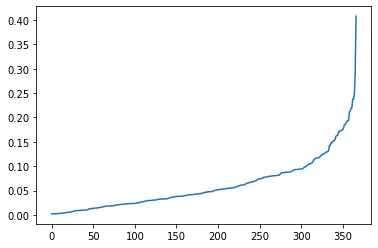

In [70]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

The Optimum Epsilon is around 0.15

#### 5.3.2. Clustering with DBSCAN

In [71]:
# from sklearn.cluster import DBSCAN

In [72]:
epsilon = 0.15
minimumSamples = 15

db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(london_gym_lv2_clustering)
labels = db.labels_
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0,  0,  0,  0, -1,  0, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,
        1,  1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1,  0,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1,
        1, -1, -1, -1,  1, -1,  1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [73]:
# Number of clusters in labels, ignoring noise if present.
DBSCANclusters = len(set(labels))
DBSCANclusters

3

In [74]:
# add clustering labels
london_gym_lv2_clustered = london_gym_lv2.copy()
london_gym_lv2_clustered.insert(0, 'Sub Cluster', labels)
london_gym_lv2_clustered.head(3)

Sub Cluster  Cluster             Venue  Venue Latitude  Venue Longitude  \
0           -1        0           PureGym       51.539250        -0.143077   
1           -1        0  Barry's Bootcamp       51.527075        -0.131056   
3           -1        0       Urban Kings       51.531300        -0.121950   

         Venue Category Borough  
0  Gym / Fitness Center  Camden  
1  Gym / Fitness Center  Camden  
3  Gym / Fitness Center  Camden

### 5.4. Visualize Clustering Output

In [75]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(DBSCANclusters)
ys = [i + x + (i*x)**2 for i in range(DBSCANclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, Ven, Ven_cat, Borough, Subcluster in zip(london_gym_lv2_clustered['Venue Latitude'], 
                                                       london_gym_lv2_clustered['Venue Longitude'],
                                                       london_gym_lv2_clustered['Venue'], 
                                                       london_gym_lv2_clustered['Venue Category'],
                                                       london_gym_lv2_clustered['Borough'],
                                                       london_gym_lv2_clustered['Sub Cluster']
                                                      ):
    label = 'Venue: {}, Category: {}, Borough: {}, Sub Cluster: {}'.format(Ven, Ven_cat, Borough, Subcluster)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color=rainbow[Subcluster],
        fill=True,
        fill_color=rainbow[Subcluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 5.5. Analyzing Each Sub Cluster

#### 5.5.1. Sub Cluster 1

In [76]:
london_gym_lv2_clustered.loc[london_gym_lv2_clustered['Sub Cluster'] == 0]

Sub Cluster  Cluster                    Venue  Venue Latitude  \
75             0        0            Virgin Active       51.523037   
77             0        0                   Gymbox       51.525592   
91             0        0                  Foundry       51.528754   
92             0        0  Finsbury Leisure Centre       51.525842   
93             0        0            Ravercise Ltd       51.527277   
..           ...      ...                      ...             ...   
424            0        0   OBSESSIVE GYM DISORDER       51.527809   
426            0        0       Crossfit City Road       51.525554   
427            0        0          énergie Fitness       51.524535   
428            0        0    Bezier Apartments Gym       51.525361   
431            0        0       Perseverance Works       51.527964   

     Venue Longitude        Venue Category         Borough  
75         -0.089570  Gym / Fitness Center  City of London  
77         -0.089320  Gym / Fitness Center  City of London  
91         -0.093125  Gym / Fitness Center       Islington  
92         -0.095348  Gym / Fitness Center  City of London  
93         -0.088667  Gym / Fitness Center  City of London  
..               ...                   ...             ...  
424        -0.086541                   Gym  City of London  
426        -0.089410                   Gym  City of London  
427        -0.090249                   Gym  City of London  
428        -0.087333                   Gym  City of London  
431        -0.077165                   Gym  City of London  

[29 rows x 7 columns]

In [77]:
london_gym_lv2_clustered.loc[london_gym_lv2_clustered['Sub Cluster'] == 0].groupby('Borough').count()

Sub Cluster  Cluster  Venue  Venue Latitude  Venue Longitude  \
Borough                                                                        
City of London           27       27     27              27               27   
Islington                 2        2      2               2                2   

                Venue Category  
Borough                         
City of London              27  
Islington                    2

#### 5.5.2. Sub Cluster 2

In [78]:
london_gym_lv2_clustered.loc[london_gym_lv2_clustered['Sub Cluster'] == 1]

Sub Cluster  Cluster                                    Venue  \
185            1        0                                Cyclebeat   
188            1        0                            Virgin Active   
192            1        0                                  PureGym   
194            1        0                         DW Fitness First   
201            1        0                     Gymbox Cannon Street   
..           ...      ...                                      ...   
482            1        0                       Ten Fitness Studio   
483            1        0                             Foundry:City   
485            1        0  Nuffield Health Fitness & Wellbeing Gym   
486            1        0                      The Altitude Centre   
540            1        0                             Montcalm Gym   

     Venue Latitude  Venue Longitude        Venue Category         Borough  
185       51.511686        -0.086461  Gym / Fitness Center  City of London  
188       51.514532        -0.085509  Gym / Fitness Center  City of London  
192       51.517088        -0.087884  Gym / Fitness Center  City of London  
194       51.512350        -0.079259  Gym / Fitness Center   Tower Hamlets  
201       51.510762        -0.089412  Gym / Fitness Center  City of London  
..              ...              ...                   ...             ...  
482       51.517999        -0.078537                   Gym  City of London  
483       51.518371        -0.078728                   Gym  City of London  
485       51.517013        -0.085127                   Gym  City of London  
486       51.514391        -0.092783                   Gym  City of London  
540       51.520826        -0.091617                   Gym  City of London  

[46 rows x 7 columns]

In [79]:
london_gym_lv2_clustered.loc[london_gym_lv2_clustered['Sub Cluster'] == 1].groupby('Borough').count()

Sub Cluster  Cluster  Venue  Venue Latitude  Venue Longitude  \
Borough                                                                        
City of London           33       33     33              33               33   
Tower Hamlets            13       13     13              13               13   

                Venue Category  
Borough                         
City of London              33  
Tower Hamlets               13

#### 5.5.3. Sub Cluster -1 (Outlier)

In [80]:
london_gym_lv2_clustered.loc[london_gym_lv2_clustered['Sub Cluster'] == -1]

Sub Cluster  Cluster                                Venue  \
0             -1        0                              PureGym   
1             -1        0                     Barry's Bootcamp   
3             -1        0                          Urban Kings   
4             -1        0  Somers Town Community Sports Centre   
6             -1        0        Pancras Square Leisure Centre   
..           ...      ...                                  ...   
498           -1        0                       Park Plaza Gym   
499           -1        0                     The May Fair Gym   
500           -1        0                          Dolphin Gym   
501           -1        0              Hiton Fitness By Precor   
539           -1        0                 Shoreditch House Gym   

     Venue Latitude  Venue Longitude        Venue Category         Borough  
0         51.539250        -0.143077  Gym / Fitness Center          Camden  
1         51.527075        -0.131056  Gym / Fitness Center          Camden  
3         51.531300        -0.121950  Gym / Fitness Center          Camden  
4         51.532768        -0.133157  Gym / Fitness Center          Camden  
6         51.533709        -0.126546  Gym / Fitness Center          Camden  
..              ...              ...                   ...             ...  
498       51.494123        -0.141674                   Gym     Westminster  
499       51.508483        -0.144305                   Gym     Westminster  
500       51.486571        -0.136734                   Gym     Westminster  
501       51.505676        -0.150208                   Gym     Westminster  
539       51.523687        -0.076177                   Gym  City of London  

[292 rows x 7 columns]

In [81]:
london_gym_lv2_clustered.loc[london_gym_lv2_clustered['Sub Cluster'] == -1].shape

(292, 7)

### 5.6. Visualize Gym Venues Sub Clusters without Outlier

In [82]:
no_outlier_london_gym_lv2_clustered = london_gym_lv2_clustered.drop(london_gym_lv2_clustered.loc[london_gym_lv2_clustered['Sub Cluster'] == -1].index)

In [83]:
no_outlier_london_gym_lv2_clustered

Sub Cluster  Cluster                                    Venue  \
75             0        0                            Virgin Active   
77             0        0                                   Gymbox   
91             0        0                                  Foundry   
92             0        0                  Finsbury Leisure Centre   
93             0        0                            Ravercise Ltd   
..           ...      ...                                      ...   
482            1        0                       Ten Fitness Studio   
483            1        0                             Foundry:City   
485            1        0  Nuffield Health Fitness & Wellbeing Gym   
486            1        0                      The Altitude Centre   
540            1        0                             Montcalm Gym   

     Venue Latitude  Venue Longitude        Venue Category         Borough  
75        51.523037        -0.089570  Gym / Fitness Center  City of London  
77        51.525592        -0.089320  Gym / Fitness Center  City of London  
91        51.528754        -0.093125  Gym / Fitness Center       Islington  
92        51.525842        -0.095348  Gym / Fitness Center  City of London  
93        51.527277        -0.088667  Gym / Fitness Center  City of London  
..              ...              ...                   ...             ...  
482       51.517999        -0.078537                   Gym  City of London  
483       51.518371        -0.078728                   Gym  City of London  
485       51.517013        -0.085127                   Gym  City of London  
486       51.514391        -0.092783                   Gym  City of London  
540       51.520826        -0.091617                   Gym  City of London  

[75 rows x 7 columns]

In [133]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(DBSCANclusters)
ys = [i + x + (i*x)**2 for i in range(DBSCANclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, Ven, Ven_cat, Borough, Subcluster in zip(no_outlier_london_gym_lv2_clustered['Venue Latitude'], 
                                                       no_outlier_london_gym_lv2_clustered['Venue Longitude'],
                                                       no_outlier_london_gym_lv2_clustered['Venue'], 
                                                       no_outlier_london_gym_lv2_clustered['Venue Category'],
                                                       no_outlier_london_gym_lv2_clustered['Borough'],
                                                       no_outlier_london_gym_lv2_clustered['Sub Cluster']
                                                      ):
    label = 'Venue: {}, Category: {}, Borough: {}, Sub Cluster: {}'.format(Ven, Ven_cat, Borough, Subcluster)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color=rainbow[Subcluster],
        fill=True,
        fill_color=rainbow[Subcluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Analysis

This level 2 clustering method could obtain more narrow clusters compared to the first clustering. All of subclusters are located in the cluster 1 area, which means the gym venues in cluster 2 and cluster 3 didn’t densely enough to be recommended. Subcluster 1 and Subcluster 2 are located in nearby area. Subcluster 1 are consisted of 29 gym venues and subcluster 2 are consisted of 46 gym venues. 

Although this subclustering result are already show the more densely gym venues in narrower area, we could try to do the same clustering method of this subclusters, which means the level 3 clustering of gym venues to find whether there are some specific location that is more dense compared by other location in those two subclusters.

## 6. Finding Sub Sub Cluster (Clustering Level 3)

### 6.1. Select Clustering Dataset

The selected dataset are gym venues that are assigned to a sub cluster from previous clustering

In [85]:
london_gym_lv3 = no_outlier_london_gym_lv2_clustered.copy()
london_gym_lv3.head()

Sub Cluster  Cluster                    Venue  Venue Latitude  \
75            0        0            Virgin Active       51.523037   
77            0        0                   Gymbox       51.525592   
91            0        0                  Foundry       51.528754   
92            0        0  Finsbury Leisure Centre       51.525842   
93            0        0            Ravercise Ltd       51.527277   

    Venue Longitude        Venue Category         Borough  
75        -0.089570  Gym / Fitness Center  City of London  
77        -0.089320  Gym / Fitness Center  City of London  
91        -0.093125  Gym / Fitness Center       Islington  
92        -0.095348  Gym / Fitness Center  City of London  
93        -0.088667  Gym / Fitness Center  City of London

In [86]:
london_gym_lv3['Borough'].unique()

array(['City of London', 'Islington', 'Tower Hamlets'], dtype=object)

In [87]:
london_gym_lv3_clustering = london_gym_lv3[['Venue Latitude', 'Venue Longitude']]
london_gym_lv3_clustering.head()

Venue Latitude  Venue Longitude
75       51.523037        -0.089570
77       51.525592        -0.089320
91       51.528754        -0.093125
92       51.525842        -0.095348
93       51.527277        -0.088667

### 6.2. Data Normalization

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
london_gym_lv3_clustering = StandardScaler().fit_transform(london_gym_lv3_clustering)

### 6.3. Clustering

#### 6.3.1. Find the optimum Epsilon

In [90]:
# from sklearn.neighbors import NearestNeighbors

In [91]:
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(london_gym_lv3_clustering)
distances, indices = nbrs.kneighbors(london_gym_lv3_clustering)

In [92]:
# from matplotlib import pyplot as plt

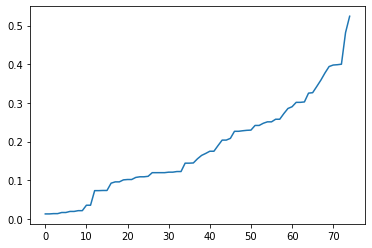

In [93]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

#### 6.3.2. Clustering with DBSCAN

In [94]:
# from sklearn.cluster import DBSCAN

In [95]:
epsilon = 0.5
minimumSamples = 10

db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(london_gym_lv3_clustering)
labels = db.labels_
labels

array([-1,  0, -1, -1,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1, -1, -1], dtype=int64)

In [96]:
# Number of clusters in labels, ignoring noise if present.
DBSCANclusters = len(set(labels))
DBSCANclusters

3

In [97]:
# add clustering labels
london_gym_clustered_level3 = london_gym_lv3.copy()
london_gym_clustered_level3.insert(0, 'Sub Sub Cluster', labels)
london_gym_clustered_level3.head(3)

Sub Sub Cluster  Sub Cluster  Cluster          Venue  Venue Latitude  \
75               -1            0        0  Virgin Active       51.523037   
77                0            0        0         Gymbox       51.525592   
91               -1            0        0        Foundry       51.528754   

    Venue Longitude        Venue Category         Borough  
75        -0.089570  Gym / Fitness Center  City of London  
77        -0.089320  Gym / Fitness Center  City of London  
91        -0.093125  Gym / Fitness Center       Islington

### 6.4. Visualize Clustering Output

In [129]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(DBSCANclusters)
ys = [i + x + (i*x)**2 for i in range(DBSCANclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, Ven, Ven_cat, Borough, Subcluster, Subsubcluster in zip(london_gym_clustered_level3['Venue Latitude'], 
                                                                      london_gym_clustered_level3['Venue Longitude'],
                                                                      london_gym_clustered_level3['Venue'], 
                                                                      london_gym_clustered_level3['Venue Category'],
                                                                      london_gym_clustered_level3['Borough'],
                                                                      london_gym_clustered_level3['Sub Cluster'],
                                                                      london_gym_clustered_level3['Sub Sub Cluster']
                                                      ):
    label = 'Venue: {}, Category: {}, Borough: {}, Sub Cluster: {}, Sub Sub Cluster: {}'.format(Ven, Ven_cat, Borough, Subcluster, Subsubcluster)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color=rainbow[Subsubcluster],
        fill=True,
        fill_color=rainbow[Subsubcluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 6.5. Analyzing Each Sub Sub Cluster

In [99]:
pd.options.display.max_rows = 15

#### 6.5.1. Sub Sub Cluster 1

In [100]:
recommended_area_1 = london_gym_clustered_level3.loc[london_gym_clustered_level3['Sub Sub Cluster'] == 0].reset_index(drop=True)
recommended_area_1

Sub Sub Cluster  Sub Cluster  Cluster                   Venue  \
0                0            0        0                  Gymbox   
1                0            0        0           Ravercise Ltd   
2                0            0        0               Outrivals   
3                0            0        0      Beth Lavis Fitness   
4                0            0        0    London Fight Factory   
5                0            0        0  Britannia Building Gym   
6                0            0        0   M by Montcalm Fitness   
7                0            0        0  OBSESSIVE GYM DISORDER   
8                0            0        0      Crossfit City Road   
9                0            0        0   Bezier Apartments Gym   

   Venue Latitude  Venue Longitude        Venue Category         Borough  
0       51.525592        -0.089320  Gym / Fitness Center  City of London  
1       51.527277        -0.088667  Gym / Fitness Center  City of London  
2       51.527736        -0.086560  Gym / Fitness Center  City of London  
3       51.525530        -0.088180  Gym / Fitness Center  City of London  
4       51.528507        -0.089985                   Gym  City of London  
5       51.528238        -0.089165                   Gym  City of London  
6       51.527703        -0.089121                   Gym  City of London  
7       51.527809        -0.086541                   Gym  City of London  
8       51.525554        -0.089410                   Gym  City of London  
9       51.525361        -0.087333                   Gym  City of London

In [101]:
london_gym_clustered_level3.loc[london_gym_clustered_level3['Sub Sub Cluster'] == 0].groupby('Borough').count()

Sub Sub Cluster  Sub Cluster  Cluster  Venue  Venue Latitude  \
Borough                                                                        
City of London               10           10       10     10              10   

                Venue Longitude  Venue Category  
Borough                                          
City of London               10              10

#### 6.5.2. Sub Sub Cluster 2

In [102]:
recommended_area_2 = london_gym_clustered_level3.loc[london_gym_clustered_level3['Sub Sub Cluster'] == 1].reset_index(drop=True)
recommended_area_2

Sub Sub Cluster  Sub Cluster  Cluster                        Venue  \
0                 1            1        0                       1Rebel   
1                 1            1        0                      PureGym   
2                 1            1        0             Crossfit Aldgate   
3                 1            1        0         F45 Liverpool Street   
4                 1            1        0             DW Fitness First   
5                 1            1        0                 Roar Fitness   
6                 1            1        0          No1 Studio Training   
7                 1            1        0          Equinox Bishopsgate   
8                 1            1        0                     IgnitePT   
9                 1            1        0  Sky Gym - Nido Spitalfields   
10                1            1        0            Andaz Health Club   
11                1            1        0           Ten Fitness Studio   
12                1            1        0                 Foundry:City   

    Venue Latitude  Venue Longitude        Venue Category         Borough  
0        51.515569        -0.080040  Gym / Fitness Center  City of London  
1        51.514475        -0.077173  Gym / Fitness Center   Tower Hamlets  
2        51.515630        -0.078790  Gym / Fitness Center   Tower Hamlets  
3        51.516653        -0.076648  Gym / Fitness Center   Tower Hamlets  
4        51.517709        -0.077321  Gym / Fitness Center   Tower Hamlets  
5        51.514090        -0.077761                   Gym   Tower Hamlets  
6        51.515372        -0.080063                   Gym  City of London  
7        51.515655        -0.081053                   Gym  City of London  
8        51.517270        -0.076664                   Gym   Tower Hamlets  
9        51.517668        -0.076767                   Gym   Tower Hamlets  
10       51.517024        -0.081103                   Gym  City of London  
11       51.517999        -0.078537                   Gym  City of London  
12       51.518371        -0.078728                   Gym  City of London

In [103]:
london_gym_clustered_level3.loc[london_gym_clustered_level3['Sub Sub Cluster'] == 1].groupby('Borough').count()

Sub Sub Cluster  Sub Cluster  Cluster  Venue  Venue Latitude  \
Borough                                                                        
City of London                6            6        6      6               6   
Tower Hamlets                 7            7        7      7               7   

                Venue Longitude  Venue Category  
Borough                                          
City of London                6               6  
Tower Hamlets                 7               7

In [104]:
recommended_area_df = london_gym_clustered_level3.loc[london_gym_clustered_level3['Sub Sub Cluster'] != -1]

In [127]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(DBSCANclusters)
ys = [i + x + (i*x)**2 for i in range(DBSCANclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, Ven, Ven_cat, Borough, Subcluster, Subsubcluster in zip(recommended_area_df['Venue Latitude'], 
                                                                      recommended_area_df['Venue Longitude'],
                                                                      recommended_area_df['Venue'], 
                                                                      recommended_area_df['Venue Category'],
                                                                      recommended_area_df['Borough'],
                                                                      recommended_area_df['Sub Cluster'],
                                                                      recommended_area_df['Sub Sub Cluster']
                                                                     ):
    label = 'Venue: {}, Category: {}, Borough: {}, Sub Cluster: {}, Sub Sub Cluster: {}'.format(Ven, Ven_cat, Borough, Subcluster, Subsubcluster)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=rainbow[Subsubcluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Analysis

This level 3 clustering method has produced satisfying outcome to get the most densely populated area by gym venues in London. The retrieved cluster area are City of London around Old Street Station and Bishopgate between City of London and Tower Hamlets. But, when we are trying to specify one of the most densely populated area of gym venues, we would choose area of Bishopgate between City of London and Tower Hamlets. This consideration is based on the number of venues in Sub Sub Cluster 2 is higher than the number of gym venues in Sub Sub Cluster 1.

## 7. Conclusion

In [123]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(DBSCANclusters)
ys = [i + x + (i*x)**2 for i in range(DBSCANclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, Ven, Ven_cat, Borough, Subcluster, Subsubcluster in zip(recommended_area_df['Venue Latitude'], 
                                                                      recommended_area_df['Venue Longitude'],
                                                                      recommended_area_df['Venue'], 
                                                                      recommended_area_df['Venue Category'],
                                                                      recommended_area_df['Borough'],
                                                                      recommended_area_df['Sub Cluster'],
                                                                      recommended_area_df['Sub Sub Cluster']
                                                                     ):
    label = 'Venue: {}, Category: {}, Borough: {}, Sub Cluster: {}, Sub Sub Cluster: {}'.format(Ven, Ven_cat, Borough, Subcluster, Subsubcluster)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='black',
        fill=True,
        fill_color=rainbow[Subsubcluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

DBSCAN Clustering Method has been successfully extract some clusters of areas in London based on gym venues location data. In order to get the specific location on the most densely populated area by gym venues, we deploy 3 levels of DBSCAN Clustering method. The higher level of DBSCAN Clustering, is conducted to find the subclusters from retrieved clusters of previous clustering method.
From the 3 levels of DBSCAN Clustering results based on only location data of gym venues, the recommended area for body builders to live in London are as follows.
1.	Sub Sub Cluster 2 (around Bishopgate, which is between City of London and Tower Hamlets)
The first recommended area for body builders to live in London in this area. The area consists of 13 gym venues on its surrounding. Which means, that if the body builders got bored or not liking one of the nearby gym venues, there are still 12 other gym venues to try.
2.	Sub Sub Cluster 1 (City of London, around Old Street Station)
This area consists of 10 gym venues on its surrounding. Which means, that if the body builders got bored or not liking one of the nearby gym venues, there are still 9 other gym venues as other alternatives. This is the second recommended area for body builders to live in London in this area.
